<font color="white">.</font> | <font color="white">.</font> | <font color="white">.</font>
-- | -- | --
![NASA](http://www.nasa.gov/sites/all/themes/custom/nasatwo/images/nasa-logo.svg) | <h1><font size="+3">ASTG Python Courses</font></h1> | ![NASA](https://www.nccs.nasa.gov/sites/default/files/NCCS_Logo_0.png)

---

<CENTER>
<H1 style="color:red">
Introduction to Numba
</H1>
</CENTER>

In [ ]:
from __future__ import print_function

> I’m becoming more and more convinced that Numba is the future of fast scientific computing in Python. 
>
> – Jake Vanderplas, 2013-06-15
>
> http://jakevdp.github.io/blog/2013/06/15/numba-vs-cython-take-2/


![fig_numba](https://thedatafrog.com/static/blog/images/2019/07/python_fast.0d88afcb4f8a.png)
Image Source: Lison Bernet 2019

## <font color='red'>What will be Covered?</font>

* What is Numba?
* How Does Numba Work?
* Numpy and Numba
* How to Use Numba?
* Parallelization with Numba
* Numba and Pandas

## <font color='red'>Reference Documents</font>
- <a href="http://numba.pydata.org/">Numba: A High Performance Python Compiler</a>
- <a href="https://www.youtube.com/watch?v=UaFSnaYh2b8">Understanding Numba - the Python and Numpy Compiler</a> (video)
- <a href="https://examples.dask.org/applications/stencils-with-numba.html">Stencil Computations with Numba</a>
- <a href="http://deepdata.com.pl/numba.html">Python on steroids - speeding up calculations with numba</a>
- <a href="https://colab.research.google.com/github/evaneschneider/parallel-programming/blob/master/COMPASS_gpu_intro.ipynb">Introduction to GPU programming with Numba</a>
- <a href="https://thedatafrog.com/en/articles/make-python-fast-numba/">Make python fast with numba</a>
- <a href="https://www.deeplearningwizard.com/deep_learning/production_pytorch/speed_optimization_basics_numba/">Speed Optimization Basics: Numba</a>
- <a href="https://murillogroupmsu.com/numba-versus-c/">High-Performance Python: Why?</a>
- <a href="https://flothesof.github.io/optimizing-python-code-numpy-cython-pythran-numba.html">Optimizing your code with NumPy, Cython, pythran and numba </a>
- <a href="https://www.polymorphe.org/index.php/looping-over-pandas-data-mkd">Looping over Pandas data</a>

## <font color='red'>What is Numba?</font>

> Numba is an open-source JIT compiler that translates a subset of Python and NumPy into fast machine code using `LLVM`, via the llvmlite Python package. It offers a range of options for parallelising Python code for CPUs and GPUs, often with only minor code changes. 
>
>Wikipedia

- Numba is a Python open source package that was originally developed by Continuum Analytics.
- The core application area are math-heavy and array-oriented functions, which are in native Python pretty slow.
- From a function, Numba can generate native code for that function as well as the wrapper code needed to call it directly from Python. This compilation is done on-the-fly and in-memory.
- It accelerates Python code (numerical functions) for both CPU and GPU:
   - **Function Compiler**: Numba compiles Python functions, not whole applications or parts of it. It is a Python module meant to improve the performance of functions with the goal of achieving a speed comparable to `C`.
   - **Just-in-time**: (Dynamic translation) Numba translates the bytecode (intermediate code more abstract than the machine code) to machine code immediately before its execution to improve the execution speed.
   - **Numerically-focused**: Numba is focused on numerical data, such as int, float, complex. 

## <font color='red'>How Does Numba Work?</font>

- Assume that you have a function `do_math` that is decorated with the Numba `@jit` decorator. 
- Compilation will be deferred until the first function execution. 
- Numba will infer the argument types at call time, and generate optimized code based on this information. 
- Numba will also be able to compile separate specializations depending on the input types. 
- The diagram below, shows all the steps carried out by Numba to execute `do_math`. 

![fig_numba](https://miro.medium.com/max/1400/1*S0S4QUjR-BsdTICtT9797Q.png)
Image Source: Continuum Analytics

- **IR**: Intermediate Representations
- **Bytecode Analysis**: Intermediate code more abstract than machine code
- **LLVM**: Low Level Virtual Machine, infrastructure to develop compilers
- **NVVM**: It is an IR compiler based on LLVM, it is designed to represent GPU kernels

## <font color='red'>Numpy and Numba</font>
- One objective of Numba is having a seamless integration with NumPy. 
- Numba excels at generating code that executes on top of NumPy arrays.
- NumPy support in Numba comes in many forms:
    1. Numba understands calls to NumPy ufuncs (universal functions: there are over 60 of them) and is able to generate equivalent native code for many of them.
    2. NumPy arrays are directly supported in Numba.
    3. Numba is able to generate ufuncs and gufuncs (generalized universal functions). This means that it is possible to implement ufuncs and gufuncs within Python, getting speeds comparable to that of ufuncs/gufuncs implemented in C extension modules using the NumPy C API.

## <font color='red'>Usage</font>
- Numba provides several utilities for code generation.
- Its central feature is the `numba.jit()` decorator. 
- Using this decorator, you can mark a function for optimization by Numba’s JIT compiler. - - - Various invocation modes trigger differing compilation options and behaviours.


Consider using Numba if:

- Is numerically orientated.
- Uses Numpy
- Relies on loops

In [7]:
import time
import numpy as np
import numba as nb
from numba import jit
from numba import njit
from numba import prange

**Checking your System**

The `numba -s` or `numba --sysinfo` command prints a lot of information about your system and your Numba installation and relevant dependencies.

In [ ]:
!numba -s

**Example**

Consider the function that multiplies two `nxn` matrices.

In [ ]:
def matrix_multiplication(A, B, C):
    """
        Perform square matrix multiplication of C = A * B using loops.
    """
    n = len(A[0])
    for i in range(n):
        for j in range(n):
            tmp = 0.
            for k in range(n):
                tmp  += A[i, k]*B[k, j]
            C[i, j] = tmp

In [ ]:
N = 200
A = np.random.rand(N, N)
B = np.random.rand(N, N)
C = np.zeros((N, N))
D = np.random.rand(N)

In [ ]:
tRegMat = %timeit -o matrix_multiplication(A, B, C)

There are two ways to use `Numba`:

- Method 1: As a function calling the function we want to speed
- Method 2: As a decorator of the function we want to speed

Method 1: Function

In [ ]:
numba_matrix_multiplication = jit(matrix_multiplication)

In [ ]:
tNumMat0 = %timeit -o numba_matrix_multiplication(A, B, C)

In [ ]:
print("Speedup Numba 0: {}".format(tRegMat.best/tNumMat0.best))

Method 2: Decorator

In [ ]:
@jit
def matrix_multiplication_numba(A, B, C):
    """
        Perform square matrix multiplication of C = A * B using loops.
    """
    n = len(A[0])
    for i in range(n):
        for j in range(n):
            tmp = 0.
            for k in range(n):
                tmp  += A[i, k]*B[k, j]
            C[i, j] = tmp

In [ ]:
%timeit matrix_multiplication_numba(A, B, C)

**Measuring the Performance of Numba**

- Once the compilation has taken place, Numba runs the machine code version of your function. 
- If it is called again with same argument types, it can reuse the cached version instead of having to compile again.
- A common mistake when measuring performance is not accounting for the above behaviour and to time code once with a simple timer that includes the time taken to compile your function in the execution time.

DO NOT REPORT THIS... COMPILATION TIME IS INCLUDED IN THE EXECUTION TIME!

In [ ]:
start_1 = time.time()
matrix_multiplication_numba(A, B, C)
end_1 = time.time()
print("Elapsed (with compilation) = %s" % (end_1 - start_1))

NOW THE FUNCTION IS COMPILED, RE-TIME IT EXECUTING FROM CACHE

In [ ]:
start_2 = time.time()
matrix_multiplication_numba(A, B, C)
end_2 = time.time()
print("Elapsed (after compilation) = %s" % (end_2 - start_2))

#### Function Signature

- You can specify the signature of the Numba function by describing the types of the arguments and the return type of the function. 
- This can produce slightly faster code as the compiler does not need to infer the types. 
- The drawback is that the function can no longer accept other types.

In [ ]:
def average_numbers(x, y):
    return (x + y)/2.0

In [ ]:
numba_average_numbers = jit(nb.float64(nb.int32, nb.int32))(average_numbers)

In [ ]:
@jit(nb.float64(nb.int32, nb.int32))
def average_numbers_numba(x, y):
    return (x + y)/2.0

- `nb.float64(nb.int32, nb.int32)` is the function’s signature specifying a function that takes two 32-bit integer arguments and returns a double precision float.
- You can also use the abbreviated notation: `nb.f8(nb.i4, nb.i4)`
- If you only pass `(nb.i4, nb.i4)` instead of `nb.f8(nb.i4, nb.i4)`, Numba will try to infer the type of the return value.
- Array signatures are specified by subscripting a base type according to the number of dimensions. 
     - A 1-dimension single-precision array would be written `nb.f4[:]`.
     - A 3-dimension array of the same underlying type would be `nb.f4[:,:,:]`.

In [ ]:
numba_matrix_multiplication = jit((nb.f8[:,:], nb.f8[:,:], nb.f8[:,:]))(matrix_multiplication)

In [ ]:
tNumMat1 = %timeit -o numba_matrix_multiplication(A, B, C)

In [ ]:
print("Speedup Numba 1: {}".format(tRegMat.best/tNumMat1.best))

**Another Example: Finding the Closet Two Points**

- Find the two closest points in an array of points in 2D. 
- Returns the two points, and the distance between them.
- If we have N points, we would have to test NxN pairs of points. 
- This algorithm has a complexity of order NxN, denoted O(NxN).

In [ ]:
import math
def python_closest(points):
    min_distance2 = 999999.
    mdp1, mdp2 = None, None
    for i in range(len(points)):
        for j in range(i+1, len(points)):
            distance2 = (points[i][0]-points[j][0])**2 + \
                        (points[i][1]-points[j][1])**2
            if distance2 < min_distance2:
               min_distance2 = distance2
               mdp1, mdp2 = points[i], points[j]
    return mdp1, mdp2, math.sqrt(min_distance2)

In [ ]:
points = np.random.uniform((-1,-1), (1,1), (8100,2))

In [ ]:
%timeit python_closest(points)

We can now use Numba to speedup the calculations. We can explicitly pass the types of the arguments to have a better performance.

In [ ]:
import math

@jit('Tuple((float64[:], float64[:], float64))(float64[:,:])', nopython=True)
def numba_closest(points):
    min_distance2 = 999999.
    mdp1, mdp2 = None, None
    for i in prange(len(points)):
        for j in prange(i+1, len(points)):
            distance2 = (points[i][0]-points[j][0])**2 + \
                        (points[i][1]-points[j][1])**2
            if distance2 < min_distance2:
               min_distance2 = distance2
               mdp1, mdp2 = points[i], points[j]
    return mdp1, mdp2, math.sqrt(min_distance2)

In [ ]:
%timeit numba_closest(points)

### Compilation Options
A number of keyword-only arguments can be passed to the `@jit` decorator:
1. `nopython`: Numba has two compilation modes:
     - **nopython mode** (`nopython=True`): Compile the decorated function so that it will run entirely without the involvement of the Python interpreter. This mode produces the highest performance code, but requires that the native types of all values in the function can be inferred. Note that <font color="red">**`@njit`**</font> is an alias for <font color="red">**`@jit(nopython=True)`**</font>.
     - **object mode**: In this mode Numba will identify loops that it can compile and compile those into functions that run in machine code, and it will run the rest of the code in the interpreter. For best performance avoid using this mode!
     - By default Numba will automatically use **object mode** if **nopython mode** cannot be used for some reason. 
     - When you are in **nopython mode**, types that cannot be inferred by the compiler will generate an error.
2. `nogil`: 
     - Whenever Numba optimizes Python code to native code that only works on native types and variables (rather than Python objects), it is not necessary anymore to hold Python’s global interpreter lock (GIL). 
     - Numba will release the GIL when entering such a compiled function if you passed `nogil=True`.
     - When using `nogil=True`, you need to be wary of the usual pitfalls of multi-threaded programming (consistency, synchronization, race conditions, etc.).
3. `cache`:
     - To avoid compilation times each time you invoke a Python program, you can instruct Numba to write the result of function compilation into a file-based cache. 
     - This is done by passing `cache=True`.
4. `parallel`: 
     - Enables automatic parallelization (and related optimizations) for operations in the function known to have parallel semantics.
     - This feature is enabled by passing `parallel=True` and must be used in conjunction with `nopython=True`.

### Exercise

Use Numba (and Dask) to speed up the code below (calculations of `pi`):

In [ ]:
%%time

import random

def approximate_pi(num_samples):
    num_points_circ = 0

    for i in range(num_samples):
        # Select an arbitrary point in [-1,1]x[-1,1]
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)

        # Check if the point is inside the circle
        if x**2 + y**2 < 1.0:
            num_points_circ += 1

    return 4 * num_points_circ / num_samples

def mean(*args):
    return sum(args) / len(args)

num_samples = 10**6
num_experiments = 10

pi_approx = mean(*[approximate_pi(num_samples) for i in range(num_experiments)])

print("Approximation of Pi: {}".format(pi_approx))

### Fastmath
- In certain classes of applications strict IEEE 754 compliance is less important. 
- It is possible to relax some numerical rigour with view of gaining additional performance. 
- The way to achieve this behaviour in Numba is through the use of the `fastmath` keyword argument.

In [ ]:
@njit(fastmath=False)
def do_sum(A):
    acc = 0.
    # without fastmath, this loop must accumulate in strict order
    for x in A:
        acc += np.sqrt(x)
    return acc

@njit(fastmath=True)
def do_sum_fast(A):
    acc = 0.
    # with fastmath, the reduction can be vectorized as floating point
    # reassociation is permitted.
    for x in A:
        acc += np.sqrt(x)
    return acc

In [ ]:
time_do_sum = %timeit -o acc1 = do_sum(D)

In [ ]:
time_do_sum_fast = %timeit  -o acc2 = do_sum_fast(D)
print(time_do_sum.best / time_do_sum_fast.best)

## <font color="red"> Parallelization </font>

- The setting `parallel=True` in `jit()` enables a Numba transformation pass that attempts to automatically parallelize and perform other optimizations on (part of) a function.
- A user program may contain operations (for instance adding a scalar value to an array) that are known to have parallel semantics.
- Each operation could be parallelized individually but that might light to poor performance due to poor cache behavior.
- Numba uses instead auto-parallelization where it identifies all operations with parallel sementics and fuses adjacent ones together, to form one or more kernels that are automatically run in parallel.
- The process is fully automated without modifications to the user program.

### Explicit Parallel Loops

- Numba parallel execution also has support for explicit parallel loop declaration similar to that in OpenMP. 
- To indicate that a loop should be executed in parallel the `numba.prange` function should be used.
- This function behaves like Python `range` and if `parallel=True` is not set it acts simply as an alias of `range`. 
- Loops induced with `prange` can be used for embarrassingly parallel computation and also reductions.

**Example**

In [ ]:
@njit(parallel=True)
def matrix_multiplication_numba2(A, B, C):
    """
        Perform square matrix multiplication of C = A * B using loops.
    """
    n = len(A[0])
    for i in prange(n):
        for j in prange(n):
            tmp = 0.
            for k in prange(n):
                tmp += A[i, k]*B[k, j]
            C[i,j] = tmp

In [ ]:
tNumMat2 = %timeit -o matrix_multiplication_numba2(A, B, C)

In [ ]:
print("Speedup Numba 2: {}".format(tRegMat.best/tNumMat2.best))

**Another Example**

In [ ]:
def evaluate_functions(n):
    """
        Evaluate the trigononmetric functions for n values evenly
        spaced over the interval [-1500.00, 1500.00]
    """
    vector1 = np.linspace(-1500.00, 1500.0, n)
    iterations = 10000
    for i in range(iterations):
        vector2 = np.sin(vector1)
        vector1 = np.arcsin(vector2)
        vector2 = np.cos(vector1)
        vector1 = np.arccos(vector2)
        vector2 = np.tan(vector1)
        vector1 = np.arctan(vector2)

In [ ]:
@njit(parallel=True)
def evaluate_functions_numba(n):
    """
        Evaluate the trigononmetric functions for n values evenly
        spaced over the interval [-1500.00, 1500.00]
    """
    vector1 = np.linspace(-1500.00, 1500.0, n)
    iterations = 10000
    for i in prange(iterations):
        vector2 = np.sin(vector1)
        vector1 = np.arcsin(vector2)
        vector2 = np.cos(vector1)
        vector1 = np.arccos(vector2)
        vector2 = np.tan(vector1)
        vector1 = np.arctan(vector2)

In [ ]:
tRegFun = %timeit -o evaluate_functions(100)

In [ ]:
tNumFun = %timeit -o evaluate_functions_numba(100)

In [ ]:
print("Speedup: {}".format(tRegFun.best/tNumFun.best))

### Diagnostics
- We can produce diagnostic information about the transforms undertaken in automatically parallelizing the decorated code. 
- This information can be accessed in two ways:
     1. Setting the environment variable: `NUMBA_PARALLEL_DIAGNOSTICS`
     2. Calling the function `parallel_diagnostics()`
- The level of verbosity in the diagnostic information is controlled by an integer argument of value between 1 and 4 inclusive, 1 being the least verbose and 4 the most.

For additional information, consult the webpage: <a href="http://numba.pydata.org/numba-doc/latest/user/parallel.html"> http://numba.pydata.org/numba-doc/latest/user/parallel.html</a>.

In [ ]:
evaluate_functions_numba.parallel_diagnostics(level=4)

## <font color="red"> Calling Other Functions</font>

- Numba functions can call other Numba functions. 
- Both functions must have the `@jit` decorator, otherwise the code will be much slower.

```python
@jit
def square(x):
    return x ** 2

@jit
def hypot(x, y):
    return math.sqrt(square(x) + square(y))
```

## <font color="red">Numba and Dask</font>

- Numba allows for run-time compilations of functions to optimize single-machine code.
    - If you intend to call a function multiple times, you can decrease your compute time significantly by compliling the function on the first call. 
    - Numba is useful for speeding up individual tasks.
- Dask is a parallel computing library for out-of-memory and distributed computations. 
    - At the heart of dask are a series of task schedulers — algorithms for determining when and how to run various user-defined computational “tasks”; consequently, dask can automatically identify which tasks can be run in parallel, or not run at all. 
    - Employing dask’s schedulers allows us to scale out to a network of many interrelated tasks and efficiently compute only those outputs we need, even on a single machine.
    
**Example**

Use Numba and Dask for the approximation of Pi.

In [ ]:
%%time

import random
import dask

@dask.delayed
@nb.jit(nopython=True, nogil=True)
def approximate_pi(num_samples):
    num_points_circ = 0

    for i in range(num_samples):
        # Select an arbitrary point in [-1,1]x[-1,1]
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)

        # Check if the point is inside the circle
        if x**2 + y**2 < 1.0:
            num_points_circ += 1

    return 4 * num_points_circ / num_samples

@dask.delayed
def mean(*args):
    return sum(args) / len(args)

number_samples = 10**6
number_experiments = 10

pi_approx = mean(*[approximate_pi(number_samples) for i in range(number_experiments)])

print("Approximation of Pi: {}".format(pi_approx.compute()))

## <font color="red">Numba and Pandas</font>

- Pandas is built on top of Numpy.
- Pandas offers flexibility in manipulating data but not necessary speed.
- This flexibility allows the creation of built-in function.
- Crude looping (over DataFrame rows for instance) in Pandas does not take advantage of any built-in optimizations, making it extremely inefficient.
- Using vectorized Pandas built-in functions (acting on Pandas Series) is almost always preferable to accomplishing similar ends with custom-written looping.

### Example

- We have a Pandas DataFrame and we want to add a new column by multiplying an exiting column by a constant.
- We use three methods methods for the multiplication operations: `apply` method, Pandas and vectorization with Numba.

In [8]:
import pandas as pd

def multiply(x):
    return x * 5
    
@nb.vectorize
def multiply_numba(x):
    return x * 5

Create a table of 100,000 rows and 4 columns filled with random numbers from 0 to 100:

In [ ]:
df = pd.DataFrame(np.random.randint(0,100,size=(100000, 4)),columns=['a', 'b', 'c', 'd'])
df

In [ ]:
time_apply = %timeit -o df['new_col1'] = df['a'].apply(multiply)

In [ ]:
time_pandas = %timeit -o df['new_col2'] = df['a'] * 5

In [ ]:
time_numba1 = %timeit -o df['new_col3'] = multiply_numba(df['a'].to_numpy())

In [ ]:
print("Multiply Apply:  {}".format(time_apply.best/time_apply.best))
print("Multiply Pandas: {}".format(time_apply.best/time_pandas.best))
print("Multiply Numba:  {}".format(time_apply.best/time_numba1.best))

#### Example

- Square the values of each row and take their mean to create a new column

In [9]:
def square_mean(row):
    row = np.power(row, 2)
    return np.mean(row)

@njit
def square_mean_numba(arr):
    res = np.empty(arr.shape[0])
    arr = np.power(arr, 2)
    for i in prange(arr.shape[0]):
        res[i] = np.mean(arr[i])
    return res

In [10]:
nrows_list = [10, 100, 1000, 10000, 100000]

In [11]:
pandas_times = list()
for nrows in nrows_list:
    df = pd.DataFrame(np.random.randint(0,100,size=(nrows, 2)),columns=['a', 'b'])
    tp = %timeit -o df['new_col'] = df.apply(square_mean, axis=1)
    pandas_times.append(tp.best)

3.04 ms ± 28.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
25.2 ms ± 677 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
257 ms ± 14.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.01 s ± 213 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
20.3 s ± 2.88 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
numba_times = list()
for nrows in nrows_list:
    df = pd.DataFrame(np.random.randint(0,100,size=(nrows, 2)),columns=['a', 'b'])
    tn = %timeit -o df['new_col'] = square_mean_numba(df.to_numpy())
    numba_times.append(tn.best)

102 µs ± 2.96 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
115 µs ± 7.46 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
154 µs ± 1.33 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
657 µs ± 64.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
5.87 ms ± 308 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [15]:
print(pandas_times)
print(numba_times)

[0.002996175549997133, 0.024544068600516767, 0.24745299049973254, 1.789480421000917, 18.07156833499903]
[9.9499519100209e-05, 0.00010769562369969208, 0.0001528813461001846, 0.0005910507360022166, 0.005486255939977127]


Text(0, 0.5, 'Time (s)')

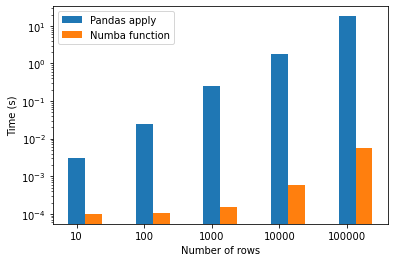

In [32]:
import matplotlib.pyplot as plt

x = np.arange(len(nrows_list))

fig, axes = plt.subplots(nrows=1, ncols=1)
width = 0.25
axes.bar(x, pandas_times, width, label='Pandas apply')
axes.bar(x + width, numba_times, width, label='Numba function')
axes.set_xticks(x)
axes.set_xticklabels(nrows_list)
axes.legend(prop={'size': 10})
axes.set_yscale('log')
axes.set_xlabel('Number of rows')
axes.set_ylabel("Time (s)")

**Could we claim that Numpy/Numba is faster than Pandas?**

- Not necessarily!
- Over time, Pandas relies more on  Cython operations.
- In Pandas 1.0 (and newer versions) Pandas’ `apply()` method (applies a function along a specific axis of a DataFrame) can make use of Numba (if installed) instead of cython and be faster. 

## <font color="red"> Using GPUs</font>

- Numba supports CUDA GPU programming by directly compiling a restricted subset of Python code into CUDA kernels and device functions following the CUDA execution model. 
- Kernels written in Numba appear to have direct access to NumPy arrays. 
- NumPy arrays are transferred between the CPU and the GPU automatically.

![GPUs](http://www.nvidia.com/docs/IO/143716/how-gpu-acceleration-works.png)
Image Source: NVIDIA

**Useful Terminology**

| Term | Meaning |
| ---  | --- |
| `host` | the CPU |
| `device` | the GPU |
| `host memory` | the system main memory |
| `device memory` | onboard memory on a GPU card |
| `kernels` | a GPU function launched by the host and executed on the device |
| `device function` | a GPU function executed on the device which can only be called from the device  |

#### Accessing the GPU on Google Colab

In order to access GPUs for free:

1. Go to the `Runtime` menu,
2. Click on `Change runtime type`, and 
3. In the pop-up box, under `Hardware accelerator`, select `GPU` and click on `SAVE`.

In [ ]:
from numba import cuda
print(cuda.gpus)

In [ ]:
!nvidia-smi

###  Average Calculations.

In [ ]:
import math

def average_sqrt(Mat, avg):
    """
        Average of the square root of all the entries of an array using loops.
    """
    avg = 0.
    for x in Mat:
        avg += math.sqrt(x)
    avg = avg/len(Mat)

In [ ]:
@njit
def average_sqrt_numba(Mat, avg):
    """
        Average of the square root of all the entries of an array using loops.
    """
    s = 0.
    for x in Mat:
        avg += math.sqrt(x)
    avg = avg/len(Mat)

We only need to specify the `cuda` target as argument of the decorator. 
Numba will automatically:

- Compile a Cuda kernel to execute the operations.
- Allocate GPU memory for the input.
- Execute the CUDA kernel with the correct kernel dimensions given the input sizes.
- Copy the result back from the GPU to the CPU.
- Return the result on the host.

In [ ]:
@jit(target ="cuda")
def average_sqrt_cuda(Mat, avg):
    """
        Average of the square root of all the entries of an array using loops.
    """
    avg = 0.
    for x in Mat:
        avg += math.sqrt(x)
    avg = avg/len(Mat)

In [ ]:
M = 1000000
Mat = np.random.rand(M)
avg = 0.

In [ ]:
time_reg = %timeit -o average_sqrt(Mat, avg)

In [ ]:
time_numba = %timeit -o average_sqrt_numba(Mat, avg)

In [ ]:
time_cuda1 = %timeit -o average_sqrt_cuda(Mat, avg)

In [ ]:
print("Regular Speedup: {}".format(time_reg.best/time_reg.best))
print("Numba   Speedup: {}".format(time_reg.best/time_numba.best))
print("Cuda    Speedup: {}".format(time_reg.best/time_cuda1.best))

### Writing Cuda Kernels

- The CUDA programming model allows you to abstract the GPU hardware into a software model composed of a **grid** containing **blocks** of **threads**. 
- These **threads** are the smallest individual unit in the programming model, and they execute together in groups (traditionally called **warps**, consisting of 32 threads each). 
- Determiming the best size for your grid of thread blocks is a complicated problem that often depends on the specific algorithm and hardware you're using, but here a few good rules of thumb:
     - The size of a block should be a multiple of 32 threads, with typical block sizes between 128 and 512 threads per block.
     - The size of the grid should ensure the full GPU is utilized where possible. Launching a grid where the number of blocks is 2x-4x the number of **streaming multiprocessors** on the GPU is a good starting place. (The Tesla K80 GPUs provided by Colaboratory have 15 SMs - more modern GPUs like the P100s on TigerGPU have 60+.)
     - The CUDA kernel launch overhead does depend on the number of blocks, so it may not be best to launch a grid where the number of threads equals the number of input elements when the input size is very big. We'll show a pattern for dealing with large inputs below.

In [ ]:
@cuda.jit
def average_sqrt_cuda_kernel(x, avg):
    tidx = cuda.threadIdx.x # this is the unique thread ID within a 1D block
    bidx = cuda.blockIdx.x  # Similarly, this is the unique block ID within the 1D grid

    block_dimx = cuda.blockDim.x  # number of threads per block
    grid_dimx = cuda.gridDim.x    # number of blocks in the grid
    
    start = tidx + bidx * block_dimx
    stride = block_dimx * grid_dimx
    
    avg = 0.
    for i in range(start, x.shape[0], stride):
        avg += np.sqrt(x[i])
    avg = avg/x.shape[0]

In [ ]:
threads_per_block = 128
blocks_per_grid = 30

In [ ]:
time_cuda2 = %timeit -o average_sqrt_cuda_kernel([blocks_per_grid, threads_per_block](Mat, avg)

In [ ]:
print("Cuda Kernel Speedup: {}".format(time_reg.best/time_cuda2.best))

### Matrix Multiplication

In [ ]:
@cuda.jit
def matrix_multiplication_cuda(A, B, C):
    """
      Perform square matrix multiplication of C = A * B using loops.
    """
    row, col = cuda.grid(2)
    if row < C.shape[0] and col < C.shape[1]:
        tmp = 0.
        for k in range(A.shape[1]):
            tmp += A[row, k] * B[k, col]
        C[row, col] = tmp

In [ ]:
tCudaMat1 = %timeit -o matrix_multiplication_cuda(A, B, C)

In [ ]:
print("Speedup Numba 2: {}".format(tRegMat.best/tNumMat2.best))
print("Speedup CUDA 1:  {}".format(tRegMat.best/tCudaMat1.best))

There can be a faster way for the matrix multiplication with Cuda:

- Each thread block is responsible for computing a square sub-matrix of C and each thread for computing an element of the sub-matrix. 
- The sub-matrix is equal to the product of a square sub-matrix of A (sA) and a square sub-matrix of B (sB). 
- In order to fit into the device resources, the two input matrices are divided into as many square sub-matrices of dimension TPB as necessary, and the result computed as the sum of the products of these square sub-matrices.
- Each product is performed by first loading sA and sB from global memory to shared memory, with one thread loading each element of each sub-matrix. 
- Once sA and sB have been loaded, each thread accumulates the result into a register (tmp). Once all the products have been calculated, the results are written to the matrix C in global memory.

In [ ]:
from numba import cuda, float32

# Controls threads per block and shared memory usage.
# The computation will be done on blocks of TPBxTPB elements.
TPB = 16

@cuda.jit
def matrix_multiplication_cuda_fast(A, B, C):
    # Define an array in the shared memory
    # The size and type of the arrays must be known at compile time
    sA = cuda.shared.array(shape=(TPB, TPB), dtype=float32)
    sB = cuda.shared.array(shape=(TPB, TPB), dtype=float32)

    x, y = cuda.grid(2)

    tx = cuda.threadIdx.x
    ty = cuda.threadIdx.y
    bpg = cuda.gridDim.x    # blocks per grid

    if x >= C.shape[0] and y >= C.shape[1]:
        # Quit if (x, y) is outside of valid C boundary
        return

    # Each thread computes one element in the result matrix.
    # The dot product is chunked into dot products of TPB-long vectors.
    tmp = 0.
    for i in range(bpg):
        # Preload data into shared memory
        sA[tx, ty] = A[x, ty + i * TPB]
        sB[tx, ty] = B[tx + i * TPB, y]

        # Wait until all threads finish preloading
        cuda.syncthreads()

        # Computes partial product on the shared memory
        for j in range(TPB):
            tmp += sA[tx, j] * sB[j, ty]

        # Wait until all threads finish computing
        cuda.syncthreads()

    C[x, y] = tmp

In [ ]:
tCudaMat2 = %timeit -o matrix_multiplication_cuda_fast(A, B, C)

In [ ]:
print("Speedup Numba 2: {}".format(tRegMat.best/tNumMat2.best))
print("Speedup CUDA 1:  {}".format(tRegMat.best/tCudaMat1.best))
print("Speedup CUDA 2:  {}".format(tRegMat.best/tCudaMat2.best))

### Mandelbrot Fractal 

In [ ]:
import matplotlib.pyplot as plt
from timeit import default_timer as timer

**Pure Python**

In [ ]:
# color function for point at (x, y)
def mandel(x, y, max_iters):
    c = complex(x, y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if z.real*z.real + z.imag*z.imag >= 4:
            return i
    return max_iters

In [ ]:
def create_fractal(xmin, xmax, ymin, ymax, image, iters):
    height, width = image.shape

    pixel_size_x = (xmax - xmin)/width
    pixel_size_y = (ymax - ymin)/height

    for x in range(width):
        real = xmin + x*pixel_size_x
        for y in range(height):
            imag = ymin + y*pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x]  = color

In [ ]:
gimage = np.zeros((1024, 1536), dtype=np.uint8)
xmin, xmax, ymin, ymax = np.array([-2.0, 1.0, -1.0, 1.0]).astype('float32')
iters = 50

start = timer()
create_fractal(xmin, xmax, ymin, ymax, gimage, iters)
dt_py = timer() - start

print("Mandelbrot created on CPU in {} s".format(dt_py))
plt.imshow(gimage);

**Numba Code**

In [ ]:
mandel_numba = jit(nb.uint32(nb.float32, nb.float32, nb.uint32))(mandel)

In [ ]:
@jit
def create_fractal_numba(xmin, xmax, ymin, ymax, image, iters):
    height, width = image.shape

    pixel_size_x = (xmax - xmin)/width
    pixel_size_y = (ymax - ymin)/height

    for x in range(width):
        real = xmin + x*pixel_size_x
        for y in range(height):
            imag = ymin + y*pixel_size_y
            color = mandel_numba(real, imag, iters)
            image[y, x]  = color

In [ ]:
gimage = np.zeros((1024, 1536), dtype=np.uint8)
xmin, xmax, ymin, ymax = np.array([-2.0, 1.0, -1.0, 1.0]).astype('float32')
iters = 50

start = timer()
create_fractal_numba(xmin, xmax, ymin, ymax, gimage, iters)
dt_numba = timer() - start

print("Mandelbrot created on CPU in {} s".format(dt_numba))
plt.imshow(gimage);

**CUDA Code**

In [ ]:
mandel_gpu = cuda.jit(restype=nb.uint32, 
                      argtypes=[nb.float32, nb.float32, nb.uint32], 
                      device=True)(mandel)

In [ ]:
@cuda.jit(argtypes=[nb.float32, nb.float32, nb.float32, nb.float32, nb.uint8[:,:], nb.uint32])
def create_fractal_kernel(xmin, xmax, ymin, ymax, image, iters):
    height, width = image.shape

    pixel_size_x = (xmax - xmin)/width
    pixel_size_y = (ymax - ymin)/height

    startX, startY = cuda.grid(2)
    gridX = cuda.gridDim.x * cuda.blockDim.x # stride in x
    gridY = cuda.gridDim.y * cuda.blockDim.y # stride in y

    for x in range(startX, width, gridX):
        real = xmin + x*pixel_size_x
        for y in range(startY, height, gridY):
            imag = ymin + y*pixel_size_y
            color = mandel_gpu(real, imag, iters)
            image[y, x]  = color

In [ ]:
gimage = np.zeros((1024, 1536), dtype=np.uint8)
blockdim = (32, 8)
griddim = (32, 16)
xmin, xmax, ymin, ymax = np.array([-2.0, 1.0, -1.0, 1.0]).astype('float32')
iters = 50

start = timer()
d_image = cuda.to_device(gimage)
create_fractal_kernel[griddim, blockdim](xmin, xmax, ymin, ymax, d_image, iters)
d_image.to_host()
dt_cuda = timer() - start

print("Mandelbrot created on GPU in {} s".format(dt_cuda))
plt.imshow(gimage);

In [ ]:
print("Speedup CPU:    {}".format(dt_py/dt_py))
print("Speedup Numba:  {}".format(dt_py/dt_numba))
print("Speedup CUDA:   {}".format(dt_py/dt_cuda))

## <font color="red">Things to Consider when Using Numba</font>

- Numba allows its behaviour to be changed through the use of <a href="http://numba.pydata.org/numba-doc/latest/reference/envvars.html">environment variables</a>. Unless otherwise mentioned, those variables have integer values and default to zero.
- Not all the <a href="http://numba.pydata.org/numba-doc/latest/reference/pysupported.html">Python features</a> are supported by Numba.
- While Python has arbitrary-sized integers, integers in Numba-compiled functions get a fixed size through type inference (usually, the size of a machine integer). This means that arithmetic operations can wrapround or produce undefined results or overflow.
- Numba may or may not copy global variables referenced inside a compiled function. Small global arrays are copied for potential compiler optimization with immutability assumption. However, large global arrays are not copied to conserve memory. The definition of “small” and “large” may change.
- Numba does not work with recusive function.
- For some operations, Numba may use a different algorithm than Python or Numpy. The results may not be bit-by-bit compatible. The difference should generally be small and within reasonable expectations. However, small accumulated differences might produce large differences at the end, especially if a divergent function is involved.

18.1 s ± 1.7 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
